In [1]:
import pandas as pd
import plotly_express as px

In [2]:
df = pd.read_csv('/home/e-saakidis/Documents/bazaraki_car_prices/DataCleaning/data_cleaned.csv')
df.head()

,Price_x,Date_Place,Brand,New_Car,Transmission,Gas,Price,Km,Year,Engine
0,€89.000,Paphos,Land,Rover Defender,Automatic,Diesel,89000,50000.0,2020.0,2.0
1,€349.000,Paphos,Lamborghini,Urus,Automatic,Petrol,349000,15000.0,2020.0,4.0
2,€3.500,Limassol,Chevrolet,Spark,Manual,Petrol,3500,130000.0,2012.0,1.0
3,€15.650,Limassol,Nissan,Note e-Power,Automatic,Hybrid,15650,32000.0,2019.0,1.2
4,€29.950,Limassol,Subaru,XV,Automatic,Hybrid,29950,13000.0,2020.0,2.0


In [3]:
df.drop(columns='Price_x', inplace=True)
df.head()

,Date_Place,Brand,New_Car,Transmission,Gas,Price,Km,Year,Engine
0,Paphos,Land,Rover Defender,Automatic,Diesel,89000,50000.0,2020.0,2.0
1,Paphos,Lamborghini,Urus,Automatic,Petrol,349000,15000.0,2020.0,4.0
2,Limassol,Chevrolet,Spark,Manual,Petrol,3500,130000.0,2012.0,1.0
3,Limassol,Nissan,Note e-Power,Automatic,Hybrid,15650,32000.0,2019.0,1.2
4,Limassol,Subaru,XV,Automatic,Hybrid,29950,13000.0,2020.0,2.0


In [4]:
df[['Km', 'Year']] = df[['Km', 'Year']].apply(pd.to_numeric, errors='coerce').astype('Int64')
df.dtypes

Date_Place       object
Brand            object
New_Car          object
Transmission     object
Gas              object
Price             int64
Km                Int64
Year              Int64
Engine          float64
dtype: object

In [5]:
df.rename(columns={'Date_Place':'Location'}, inplace=True)

In [6]:
df.rename(columns={'Location':'City'}, inplace=True)

In [7]:
df.drop(columns='New_Car', inplace=True)

## EDA (Exploratory Data Analysis)
After changing the data type of Km and year column from float to int now we can start doing some analysis

In [8]:
data_frame = df.copy()

In [9]:
total_price_city = df.groupby('City')['Price'].sum().sort_values(ascending=False)
total_price_city

City
Lefkosia     47405898
Limassol     40721432
Paphos       14040261
Larnaca      10138914
Famagusta     2315239
Name: Price, dtype: int64

In [10]:
median_price_city = df.groupby('City')['Price'].median().sort_values(ascending=False)
median_price_city

City
Limassol     15999.0
Lefkosia     14975.0
Paphos       13500.0
Larnaca      11900.0
Famagusta    10000.0
Name: Price, dtype: float64

In [11]:
df.describe()

,Price,Km,Year,Engine
count,4324.000000,4315.0,4321.0,4271.000000
mean,26508.266420,409387.835458,2011.655867,2.063568
std,40660.715671,16997838.312639,8.70631,0.852080
min,300.000000,0.0,1955.0,0.400000
25%,6500.000000,51000.0,2007.0,1.500000
50%,14500.000000,109000.0,2014.0,2.000000
75%,29750.000000,177000.0,2018.0,2.400000
max,518000.000000,1111111111.0,2023.0,8.000000


In [12]:
px.histogram(df, x='City', template='plotly_dark')

In [13]:
px.histogram(df, x='Brand', template='plotly_dark')

In [14]:
top_ten_count = df.groupby('Brand')['City'].count().sort_values(ascending=False).head(10)
top_ten_count


Brand
Mercedes-Benz    669
BMW              523
Toyota           389
Nissan           298
Mazda            263
Land             188
Audi             176
Volkswagen       176
Mitsubishi       153
Ford             132
Name: City, dtype: int64

In [15]:
df.groupby('Engine')['Price'].median().sort_values(ascending=False)

Engine
6.5    394497.5
3.9    360000.0
6.7    230000.0
4.0    142500.0
4.3    131350.0
6.3     97000.0
2.9     93000.0
5.2     76500.0
4.4     75000.0
5.5     69600.0
3.8     68500.0
3.6     66000.0
4.7     61750.0
5.0     58000.0
0.4     56900.0
6.0     56000.0
3.3     55000.0
4.6     47350.0
6.2     45000.0
3.0     41150.0
5.7     39950.0
5.3     39900.0
3.5     39500.0
3.4     33500.0
4.5     32000.0
3.7     28900.0
6.4     27500.0
2.1     26000.0
5.4     25000.0
6.8     25000.0
2.0     23850.0
2.3     21000.0
2.4     20900.0
2.6     20000.0
2.2     19450.0
4.2     18400.0
0.8     15800.0
6.6     15500.0
1.5     15300.0
1.7     15000.0
2.5     14650.0
3.2     12249.5
0.9     12200.0
1.2     11700.0
1.0     10300.0
2.7      9900.0
8.0      9300.0
1.8      8450.0
0.6      8175.0
2.8      7950.0
0.7      7300.0
1.1      7200.0
1.3      7000.0
1.6      6000.0
1.4      5900.0
3.1      3999.0
1.9      3200.0
Name: Price, dtype: float64

In [16]:
df.dropna(axis=0, how='any', inplace=True)

In [17]:
df['Engine'].sort_values(ascending=False)

1369    8.0
885     8.0
1882    6.8
2156    6.8
3536    6.8
       ... 
3894    0.6
3417    0.4
811     0.4
3395    0.4
3060    0.4
Name: Engine, Length: 4260, dtype: float64

In [18]:
df['Transmission'].unique()

array(['Automatic', 'Manual', 'None'], dtype=object)

In [26]:
fig1 = px.bar(df, x="City", color="Transmission",
        pattern_shape="Transmission", pattern_shape_sequence=[".", "x", "+"], template='plotly_dark')
fig1.show()


In [20]:
px.bar(df, x="City", y="Transmission", color="Transmission", barmode="group", template='plotly_dark')

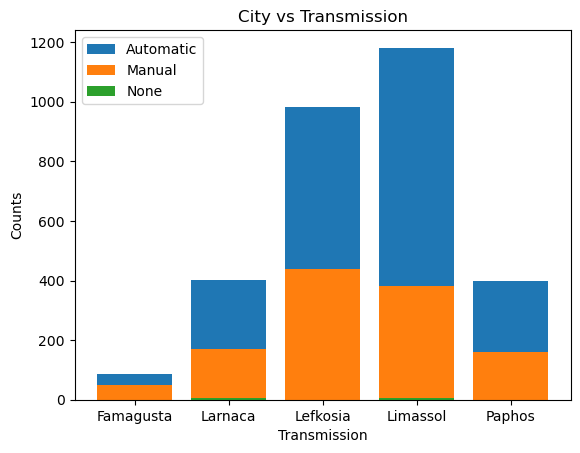

In [65]:
import matplotlib.pyplot as plt

grouped = df.groupby(['City', 'Transmission']).size().reset_index(name='counts')
plt.style.use('default')
fig, ax = plt.subplots()

for name, group in grouped.groupby('Transmission'):
    ax.bar(group['City'], group['counts'], label=name)

ax.set_xlabel('Transmission')
ax.set_ylabel('Counts')
ax.set_title('City vs Transmission')
ax.legend()
plt.show()


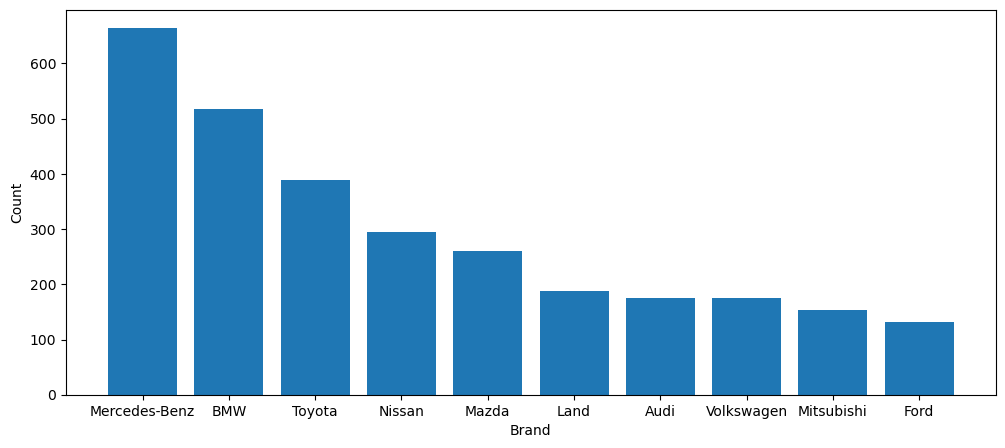

In [64]:
brand_counts = df['Brand'].value_counts().head(10)
plt.style.use('default')
plt.figure(figsize=(12, 5))
plt.bar(brand_counts.index, brand_counts.values)

plt.xlabel('Brand')
plt.ylabel('Count')

plt.show()

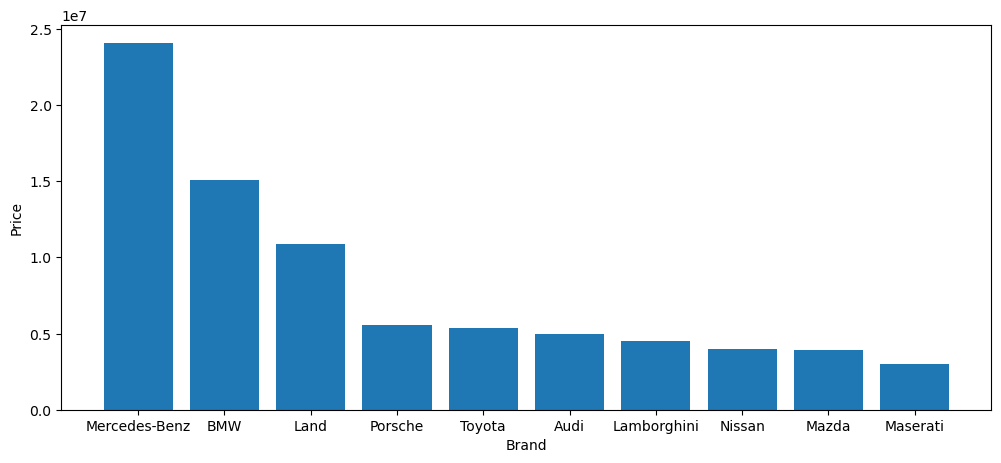

In [69]:
brand_total_price = df.groupby('Brand')['Price'].sum().sort_values(ascending=False).head(10)
plt.style.use('default')
plt.figure(figsize=(12, 5))
plt.bar(brand_total_price.index, brand_total_price.values)

plt.xlabel('Brand')
plt.ylabel('Price')

plt.show()

In [71]:
aggregated_data = df.groupby(by='Brand').agg({'Price': 'sum', 'Brand': 'count'})
aggregated_data = aggregated_data.rename(columns={'Brand': 'Count'})
correlation = aggregated_data.corr().iloc[0, 1]
correlation


0.8747907492598199

A Pearson correlation coefficient of 0.87 between the count of cars and the sum of prices for each brand indicates a strong positive correlation. In other words, as the count of cars for a brand increases, the sum of prices for that brand is also likely to increase, and vice versa. The value of 0.87 means that there is a strong linear relationship between the two variables, with 87% of the variance in the sum of prices being explained by the count of cars.

In [90]:
aggregated_data3 = df.groupby(by='Brand').agg({'Price': 'sum', 'Brand': 'count'})
aggregated_data3 = aggregated_data3.rename(columns={'Brand': 'Count'})

# Create the scatter plot using plotly_express
aggregated_data3['Brand'] = aggregated_data3.index
px.scatter(aggregated_data3, x='Count', y='Price', color='Brand', color_discrete_sequence=px.colors.qualitative.Dark24)


In [83]:
df

,City,Brand,Transmission,Gas,Price,Km,Year,Engine
0,Paphos,Land,Automatic,Diesel,89000,50000,2020,2.0
1,Paphos,Lamborghini,Automatic,Petrol,349000,15000,2020,4.0
2,Limassol,Chevrolet,Manual,Petrol,3500,130000,2012,1.0
3,Limassol,Nissan,Automatic,Hybrid,15650,32000,2019,1.2
4,Limassol,Subaru,Automatic,Hybrid,29950,13000,2020,2.0
...,...,...,...,...,...,...,...,...
4319,Lefkosia,Ford,Manual,Diesel,18000,62000,2018,1.5
4320,Larnaca,Suzuki,Automatic,Petrol,8990,57000,2015,1.3
4321,Lefkosia,Smart,Automatic,Petrol,17999,48200,2018,0.9
4322,Lefkosia,Volkswagen,Automatic,Petrol,5500,159000,2008,1.4
